**Problem Statement**

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :
Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual 

owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [5]:
fraud=pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


**Feature Engineering**

In [9]:
fraud1=fraud.copy()

list=[]
for i in range(0,len(fraud)):
  if fraud['Taxable.Income'][i]<=30000:
    list.append('Risky')
  elif fraud['Taxable.Income'][i]>30000:
    list.append('Good')

fraud1['type']=list
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [10]:
fraud1.type.value_counts()

Good     476
Risky    124
Name: type, dtype: int64

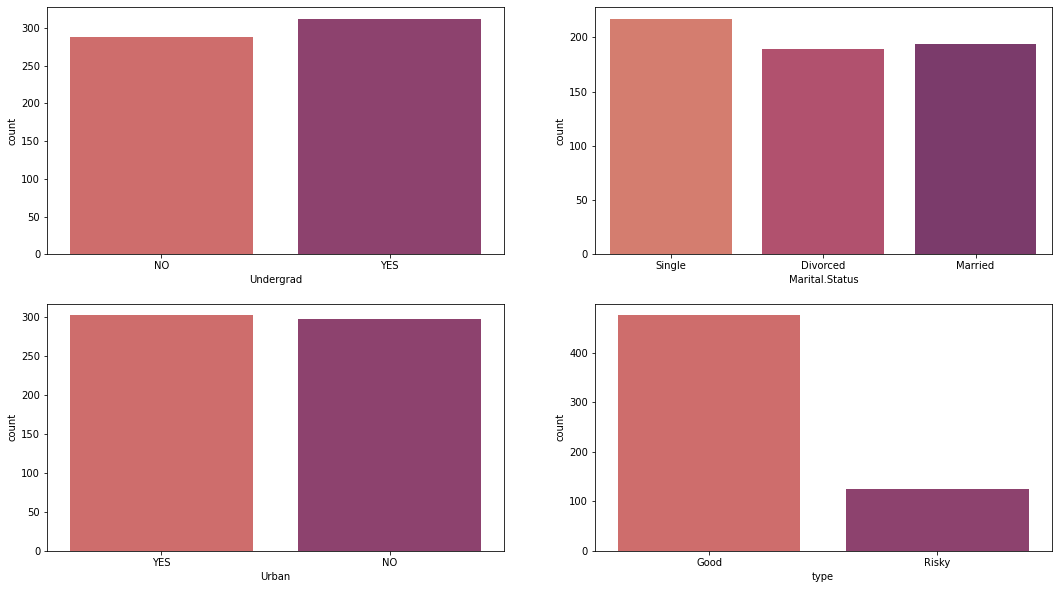

In [13]:
#Visualisation for categorical features
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(fraud1['Undergrad'],palette='flare')
plt.subplot(2,2,2)
sns.countplot(fraud1['Marital.Status'],palette='flare')

plt.subplot(2,2,3)
sns.countplot(fraud1['Urban'],palette='flare')
plt.subplot(2,2,4)
sns.countplot(fraud1['type'],palette='flare')

plt.show()

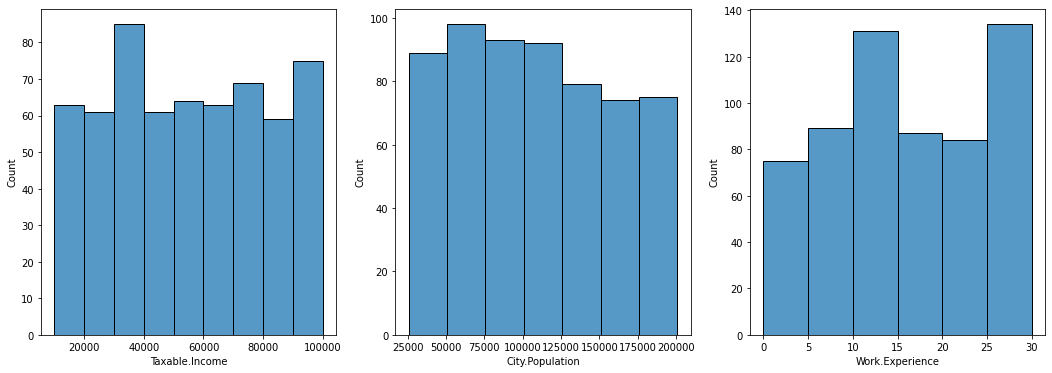

In [14]:
#Visualisation for continuous features
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(fraud1['Taxable.Income'],bins=range(min(fraud1['Taxable.Income']),max(fraud1['Taxable.Income'])+10000,10000))

plt.subplot(1,3,2)
sns.histplot(fraud1['City.Population'],bins=range(min(fraud1['City.Population']),max(fraud1['City.Population'])+25000,25000))

plt.subplot(1,3,3)
sns.histplot(fraud1['Work.Experience'],bins=range(min(fraud1['Work.Experience']),max(fraud1['Work.Experience'])+5,5))

plt.show()

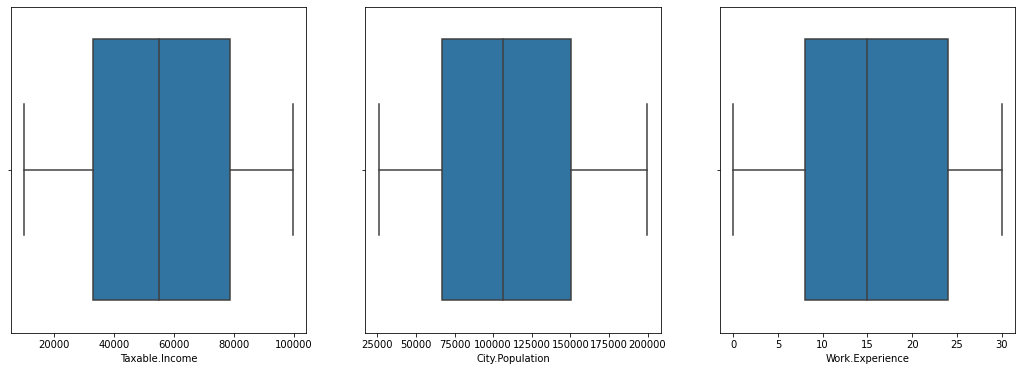

In [15]:
#Box-plot for outlier detection
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(fraud1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(fraud1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(fraud1['Work.Experience'] ) 

plt.show()

**Univariate Analysis**

In [16]:
type_risky=pd.DataFrame()
type_good=pd.DataFrame()

type_risky=fraud1.loc[fraud1['type']=='Risky']

type_good=fraud1.loc[fraud1['type']=='Good']

Taxable.Income with respect to Fraud

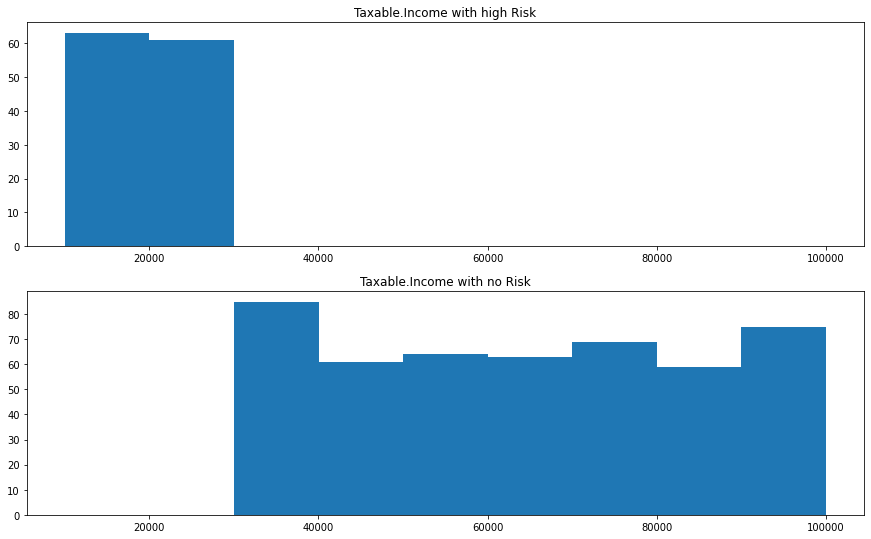

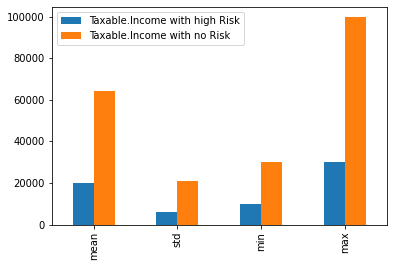

In [17]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(type_risky['Taxable.Income'],bins=range(min(fraud1['Taxable.Income']),max(fraud1['Taxable.Income'])+10000,10000))
plt.title('Taxable.Income with high Risk')

plt.subplot(3,1,2)
plt.hist(type_good['Taxable.Income'],bins=range(min(fraud1['Taxable.Income']),max(fraud1['Taxable.Income'])+10000,10000))
plt.title('Taxable.Income with no Risk',)

income_describe=pd.DataFrame()

income_describe['Taxable.Income with high Risk']=type_risky['Taxable.Income'].describe()
income_describe['Taxable.Income with no Risk']=type_good['Taxable.Income'].describe()
income_describe=income_describe.drop(['count','25%','50%','75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show()

Work.Experience with respect to Fraud

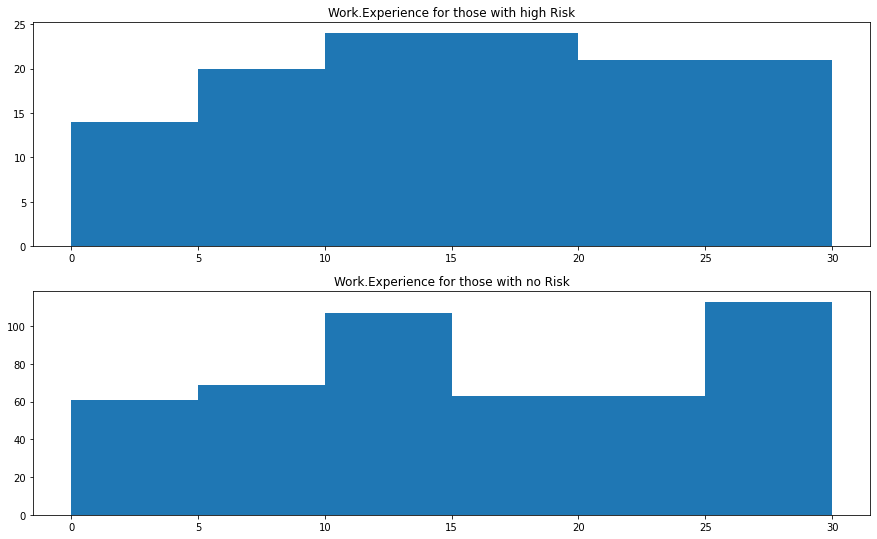

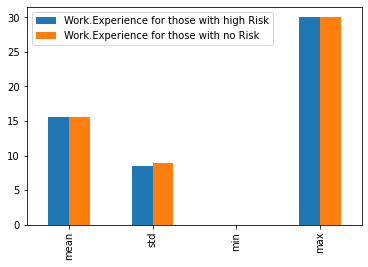

In [18]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(type_risky['Work.Experience'],bins=range(min(fraud1['Work.Experience']),max(fraud1['Work.Experience'])+5,5))
plt.title('Work.Experience for those with high Risk')

plt.subplot(3,1,2)
plt.hist(type_good['Work.Experience'],bins=range(min(fraud1['Work.Experience']),max(fraud1['Work.Experience'])+5,5))
plt.title('Work.Experience for those with no Risk',)

exp_describe=pd.DataFrame()

exp_describe['Work.Experience for those with high Risk']=type_risky['Work.Experience'].describe()
exp_describe['Work.Experience for those with no Risk']=type_good['Work.Experience'].describe()
exp_describe = exp_describe.drop(['count','25%','50%','75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show()

Undergrad Education with respect to Fraud

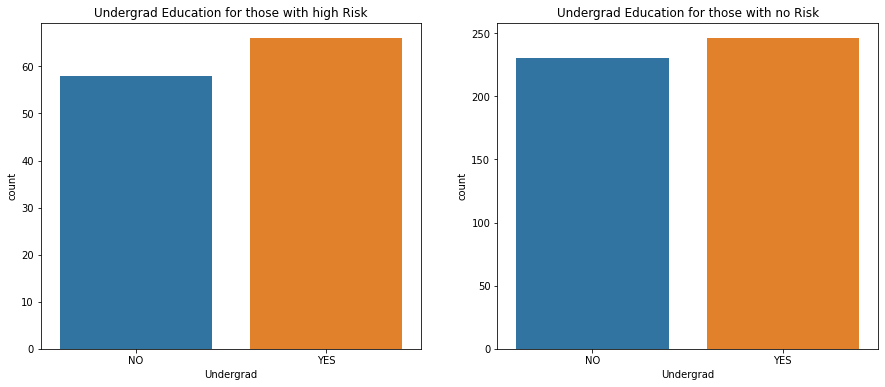

In [19]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(type_risky['Undergrad'])
plt.title('Undergrad Education for those with high Risk')

plt.subplot(1,2,2)
sns.countplot(type_good['Undergrad'])
plt.title('Undergrad Education for those with no Risk',)

plt.show()

Marital Status with respect to Fraud

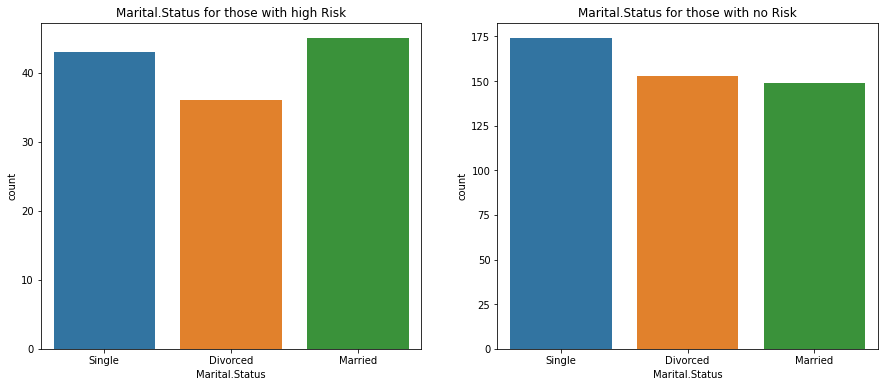

In [20]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(type_risky['Marital.Status'])
plt.title('Marital.Status for those with high Risk')

plt.subplot(1,2,2)
sns.countplot(type_good['Marital.Status'])
plt.title('Marital.Status for those with no Risk',)

plt.show()

Residence with respect to Fraud

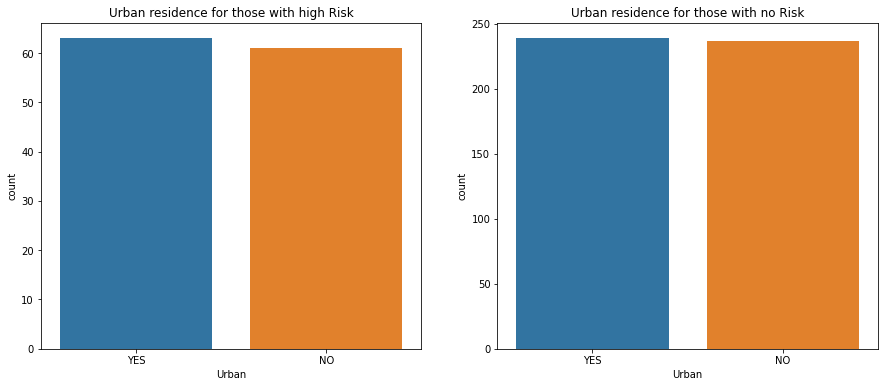

In [21]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(type_risky['Urban'])
plt.title('Urban residence for those with high Risk')

plt.subplot(1,2,2)
sns.countplot(type_good['Urban'])
plt.title('Urban residence for those with no Risk',)

plt.show()

**Preprocessing of the data**

In [23]:
fraud2=fraud1.copy()
fraud2=fraud2.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience","Urban":"urban"})
fraud2.drop("taxable_income",axis=1,inplace=True)
fraud2

,undergrad,marital_status,city_population,work_experience,urban,type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [24]:
x=fraud2.drop("type",axis=1)
y=fraud2["type"]

In [27]:
#Encoding of input categorical features
x=pd.get_dummies(x)

In [28]:
#Encoding output categorical features
le=LabelEncoder()
y=le.fit_transform(y)

Splitting data into training set & test set.

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [30]:
print("Shape of X_train:",x_train.shape)
print("Shape of X_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (480, 9)
Shape of X_test: (120, 9)
Shape of y_train: (480,)
Shape of y_test: (120,)


**Decision Tree Classifier**

1) Building decision tree classifier using entropy criteria

In [31]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
#Understanding correct & wrong predictions using 2-way table
pd.crosstab(y_test,pred)

col_0,0
row_0,
0,92
1,28


In [35]:
#Accuracy
np.mean(pred==y_test)

0.7666666666666667

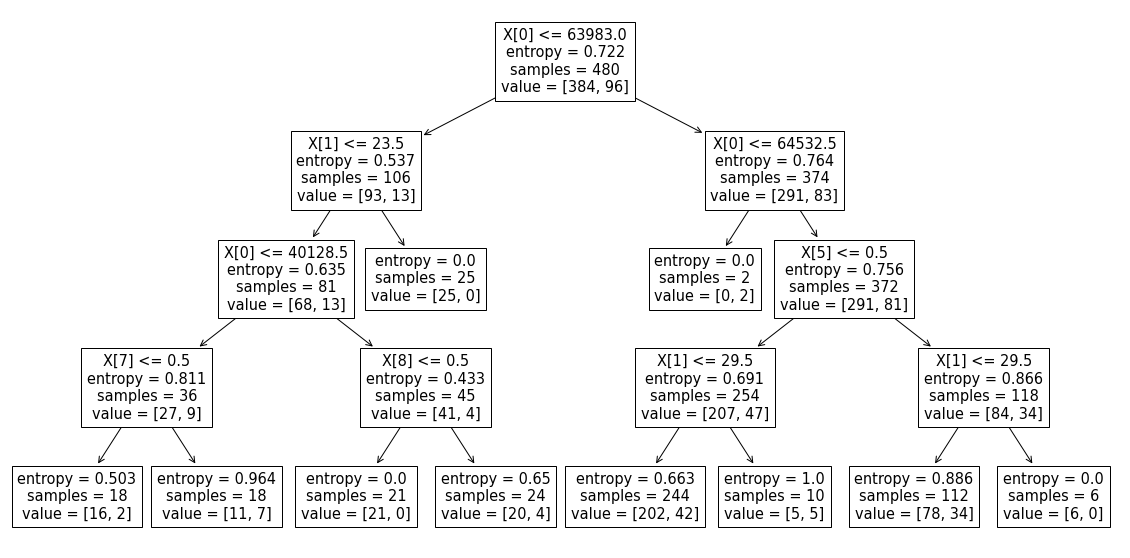

In [36]:
plt.figure(figsize=(20,10))
tree.plot_tree(model)
plt.show()

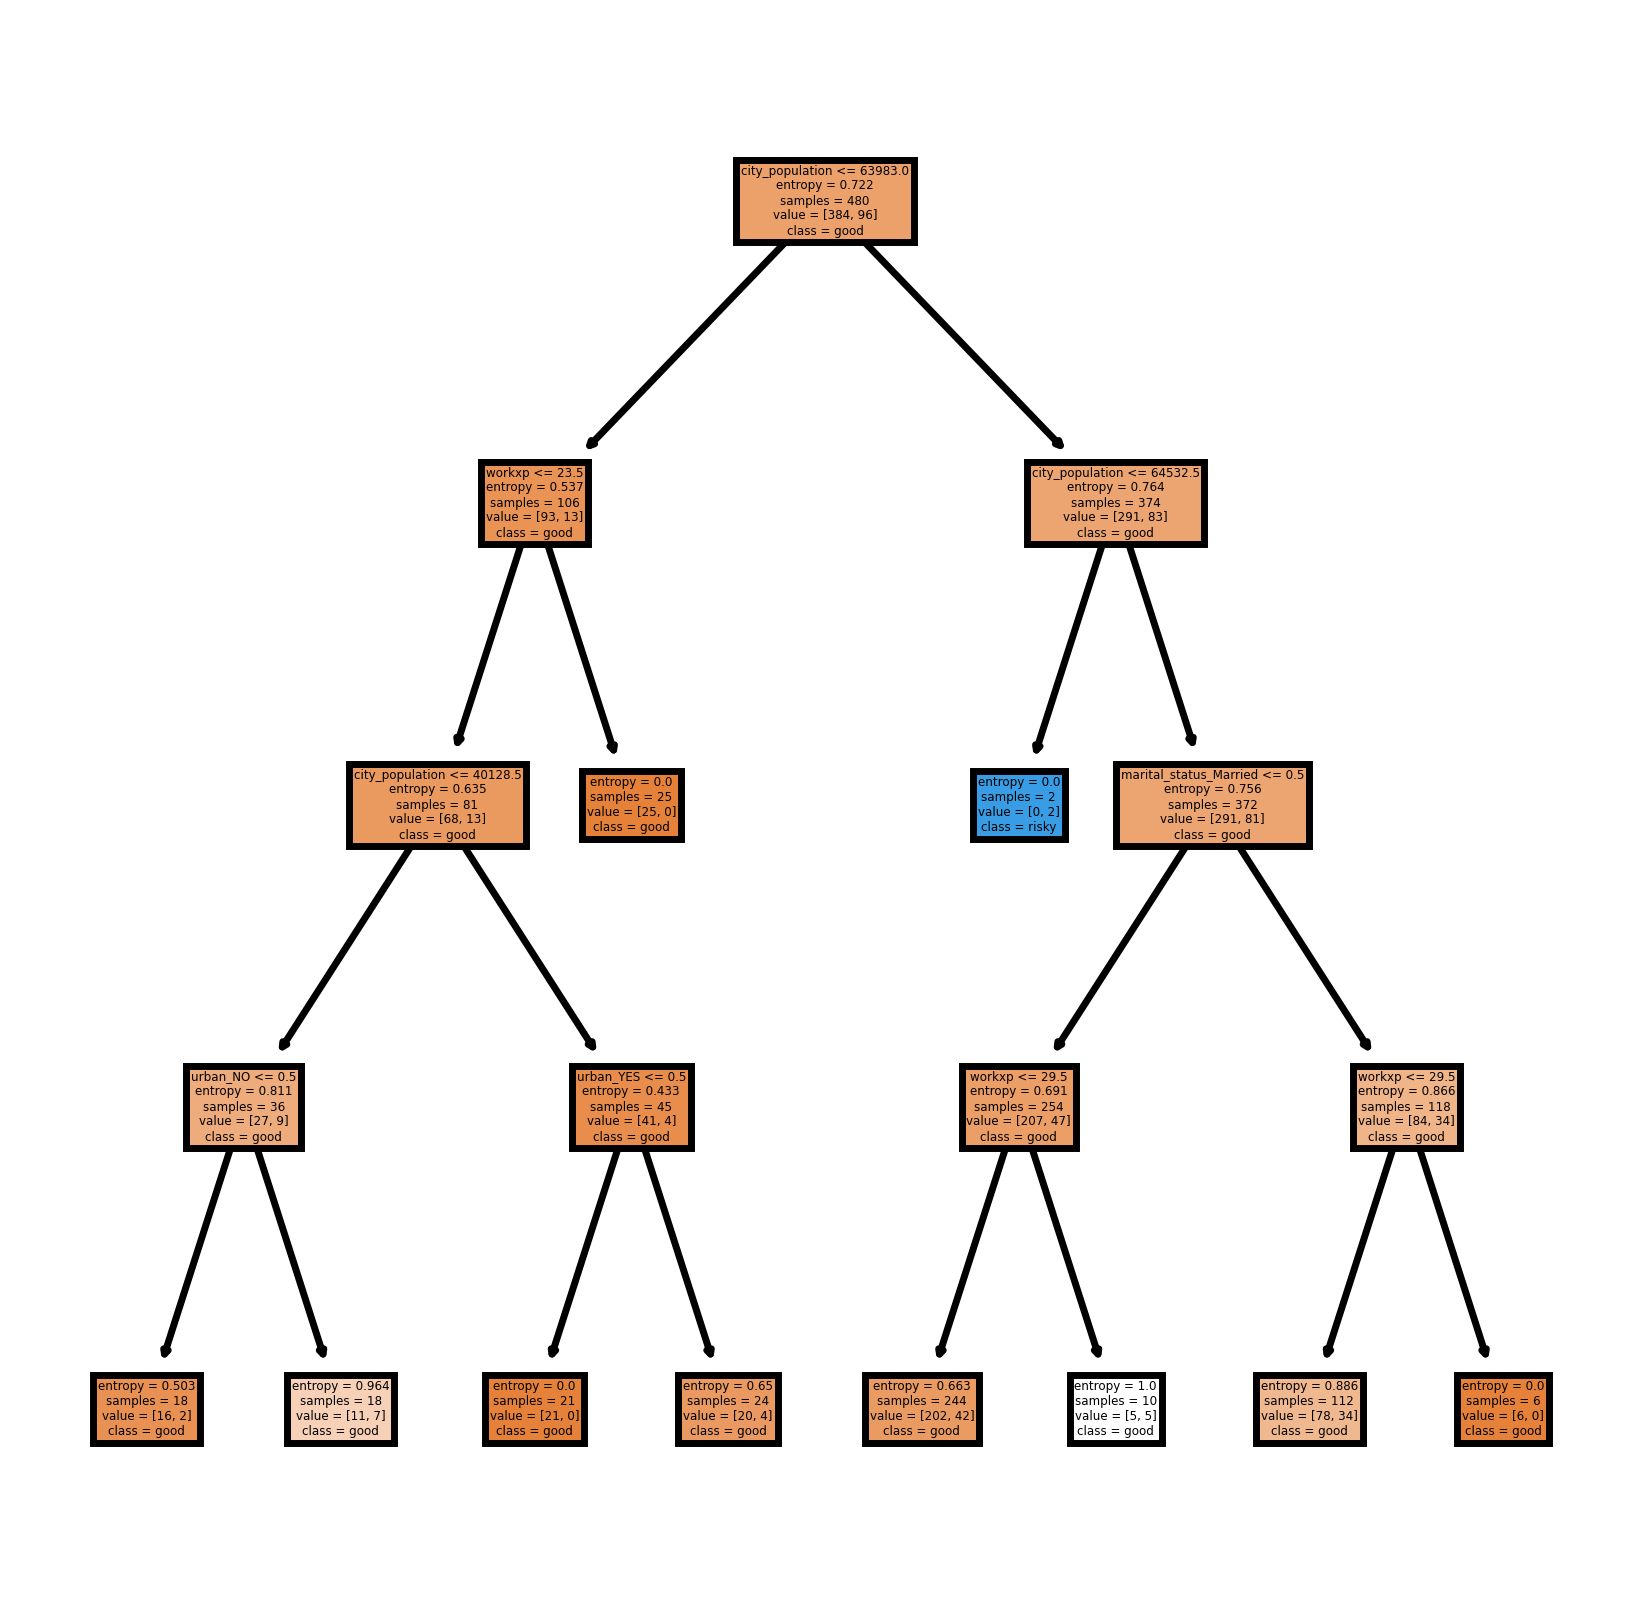

In [37]:
#To increase the resolution of the plot
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good','risky']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

2) Building decision tree (CART) classifier using Gini Index criteria.

In [38]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
#Prediction & computing the accuracy
pred=model_gini.predict(x_test)
pred_gini=model_gini.predict(x_test)
pred_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
np.mean(pred_gini==y_test)

0.7583333333333333

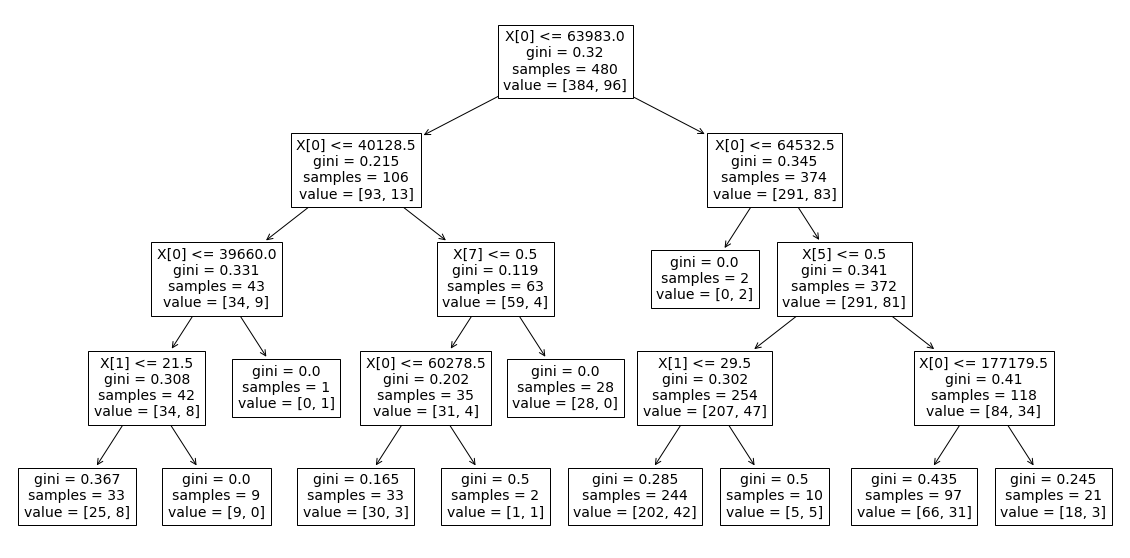

In [41]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_gini)
plt.show()

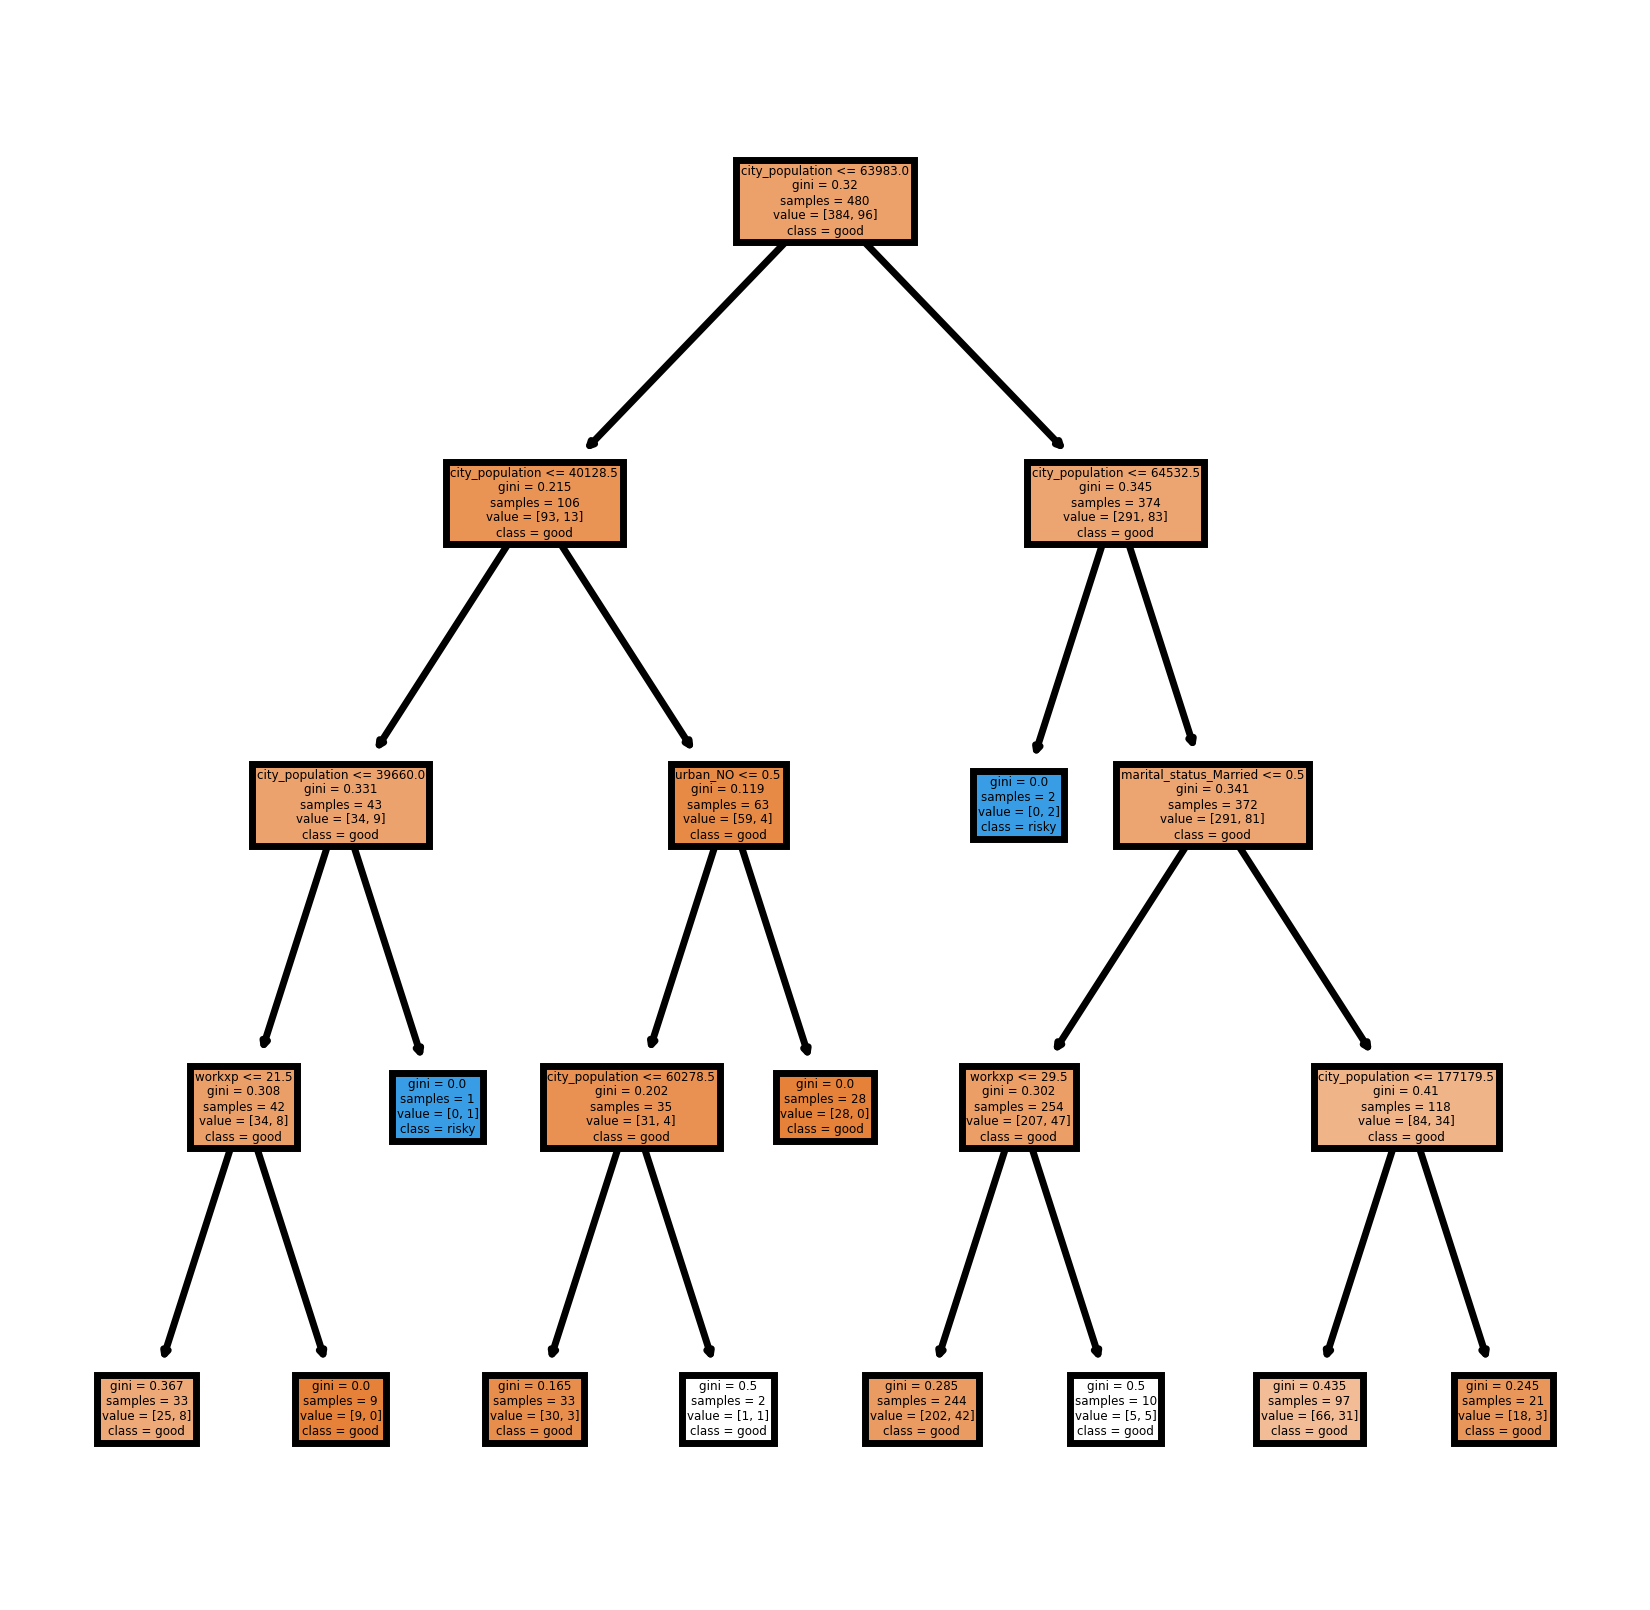

In [45]:
#To increase the resolution of the plot
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good','risky']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(model_gini,
               feature_names=fn,
               class_names=cn,
               filled=True);

3) Grid search for hyper parameter

In [46]:
kfold=KFold(n_splits=10,shuffle=True)  
param_dict={
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}
DT=DecisionTreeClassifier()
grid=GridSearchCV(DT,param_grid=param_dict,cv=kfold)

grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [47]:
print(grid.best_score_)
print(grid.best_params_)

0.795
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}


4) Building the final model on grid.best_params_

In [48]:
num_folds=10
kfold=KFold(n_splits=10,shuffle=True)

In [49]:
model_kf=grid.best_estimator_
model_kf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3)

In [50]:
results=cross_val_score(model_kf,x,y,cv=kfold)
print("Accuracy with K-Fold is: ",np.round(results.mean(),4))

Accuracy with K-Fold is:  0.7933


In [52]:
model=grid.best_estimator_
model.fit(x_train,y_train)

pred=model.predict(x_test)
print("Accuracy with Train_Test Split is:",accuracy_score(y_test,pred))

Accuracy with Train_Test Split is: 0.7666666666666667


In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



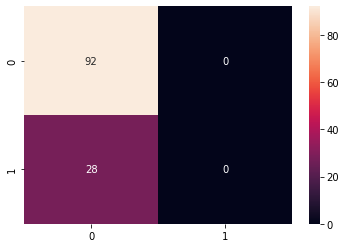

In [54]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

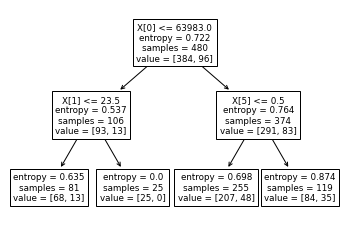

In [55]:
#Plot the decision tree with K-Fold model
tree.plot_tree(model_kf)
plt.show()

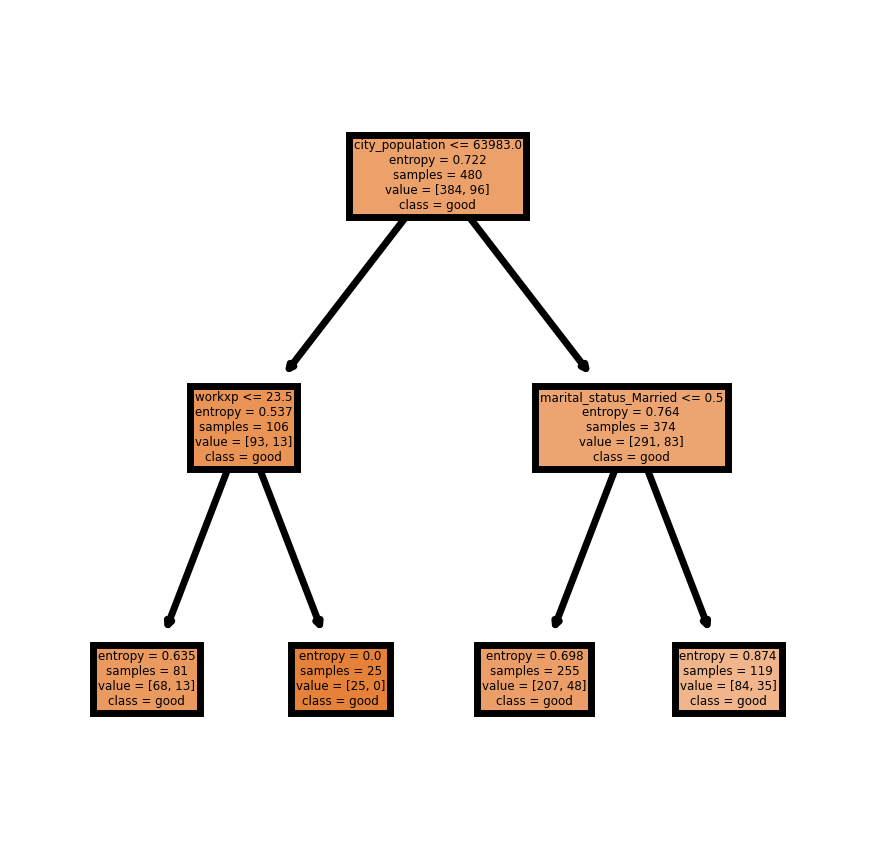

In [56]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good','risky']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=500)
tree.plot_tree(model_kf,
               feature_names=fn,
               class_names=cn,
               filled=True);